### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

### Preprocessing and Loading images

In [2]:
!git clone https://github.com/Bhageerath1/lab-internal.git

Cloning into 'lab-internal'...
remote: Enumerating objects: 1358, done.
remote: Counting objects: 100% (1358/1358), done.
remote: Compressing objects: 100% (452/452), done.
remote: Total 1358 (delta 906), reused 1358 (delta 906), pack-reused 0
Receiving objects: 100% (1358/1358), 5.27 MiB | 6.22 MiB/s, done.
Resolving deltas: 100% (906/906), done.


In [5]:
image_size = 224
batch_size = 32
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/.255,shear_range=0.2,
                                                        zoom_range=0.2,horizontal_flip=True)
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/.255)

In [6]:
train_set = train.flow_from_directory(r'./lab-internal/dataset_mnist/train',
                                      target_size=(image_size,image_size),
                                      batch_size=batch_size,
                                      class_mode='categorical'
                                     )
test_set = test.flow_from_directory(r'./lab-internal/dataset_mnist/test',
                                      target_size=(image_size,image_size),
                                    batch_size=batch_size,
                                      class_mode='categorical'
                                     )

Found 1000 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


## Buidling CNN model

In [10]:
model = Sequential([
    Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu',input_shape = (224,224,3)),
    Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu'),
    MaxPool2D(pool_size =2, strides =2, padding ='same'),
    Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu'),
    MaxPool2D(pool_size =2, strides =2, padding ='same'),
    Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu'),
    MaxPool2D(pool_size =2, strides =2, padding ='same'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    MaxPool2D(pool_size =2, strides =2, padding ='same'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu'),
    MaxPool2D(pool_size =2, strides =2, padding ='same'),
    Flatten(),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 4096, activation ='relu'),
    Dense(units = 10, activation ='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

## Model compilation

## Fitting the model

In [8]:
model.compile(loss="categorical_crossentropy", optimizer ='Adam',metrics=["accuracy"])
history = model.fit(train_set,epochs=15,validation_data=test_set)

Epoch 1/15
32/32 [==============================] - 45s 674ms/step - loss: 217.4509 - accuracy: 0.1520 - val_loss: 2.1372 - val_accuracy: 0.2100
Epoch 2/15
32/32 [==============================] - 18s 555ms/step - loss: 1.7872 - accuracy: 0.3540 - val_loss: 1.3471 - val_accuracy: 0.5000
Epoch 3/15
32/32 [==============================] - 17s 530ms/step - loss: 1.0827 - accuracy: 0.6100 - val_loss: 0.6401 - val_accuracy: 0.7800
Epoch 4/15
32/32 [==============================] - 17s 528ms/step - loss: 0.6642 - accuracy: 0.7940 - val_loss: 0.4225 - val_accuracy: 0.8500
Epoch 5/15
32/32 [==============================] - 17s 538ms/step - loss: 0.5304 - accuracy: 0.8290 - val_loss: 0.3196 - val_accuracy: 0.9000
Epoch 6/15
32/32 [==============================] - 18s 547ms/step - loss: 0.3524 - accuracy: 0.8830 - val_loss: 0.4123 - val_accuracy: 0.8800
Epoch 7/15
32/32 [==============================] - 17s 532ms/step - loss: 0.3322 - accuracy: 0.8890 - val_loss: 0.3783 - val_accuracy: 0.89

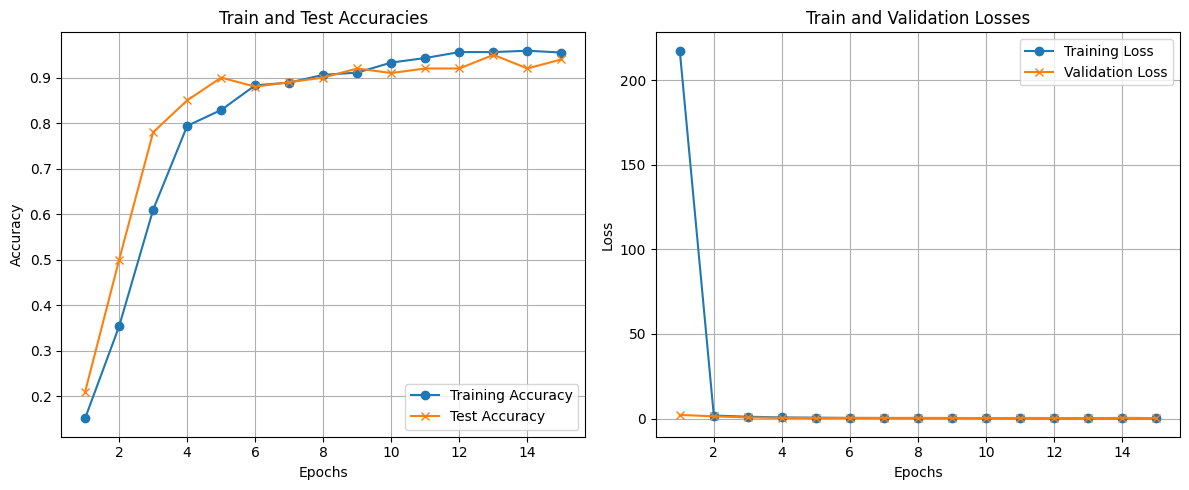

In [9]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1,len(train_accuracy)+1), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1,len(train_accuracy)+1), val_accuracy, label='Test Accuracy', marker='x')
plt.title('Train and Test Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1,len(train_accuracy)+1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1,len(train_accuracy)+1), val_loss, label='Validation Loss', marker='x')
plt.title('Train and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
